In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Excersice ML/bengaluru_house_prices.csv')

In [5]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [7]:
df.shape

(13320, 9)

In [8]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [9]:
k = df.groupby('area_type')
k.sum()

,bath,balcony,price
area_type,,,
Built-up Area,6385.0,3402.0,252162.335
Carpet Area,218.0,115.0,7786.705
Plot Area,7822.0,2558.0,422203.360
Super built-up Area,21244.0,14064.0,817221.745


In [10]:
k = df.groupby('area_type')['area_type']
k.sum()

area_type
Built-up  Area          Built-up  AreaBuilt-up  AreaBuilt-up  AreaBuil...
Carpet  Area            Carpet  AreaCarpet  AreaCarpet  AreaCarpet  Ar...
Plot  Area              Plot  AreaPlot  AreaPlot  AreaPlot  AreaPlot  ...
Super built-up  Area    Super built-up  AreaSuper built-up  AreaSuper ...
Name: area_type, dtype: object

In [11]:
df.groupby('area_type')['area_type'].agg('count')
# Pandas groupby is used for grouping the data according to the categories and apply 
# a function to the categories. It also helps to aggregate data efficiently.

# Pandas Series.agg() is used to pass a function or list of function to be applied 
# on a series or even each element of series separately.

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [12]:
df.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [13]:
df2 = df.drop(['area_type','society','balcony','availability'],axis='columns')

In [14]:
df2.shape

(13320, 5)

In [15]:
df2.isnull().sum()
# very less null values so we will simply drop those rows

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [16]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [17]:
df3.head()
# Since in the "size" columns the data seems to have some data which not look similar to the
# other majority of the values.
# we will explore it a little more

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [18]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [19]:
#we will create a new column which will have only the no. of size.
# Will use lambda function and split the size and get the 0 index value
#also at the end we convert the  string into int
df3['BHK'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [20]:
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [21]:
# When checkinh unique we can see that there is data which says 43 bhk room exist
df3['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [22]:
df3[df3['BHK']==43]

,location,size,total_sqft,bath,price,BHK
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [23]:
# Can see that below a 2400sqft is said to have 43 bedrooms which is not possible
# Chances are that its an outlier/error
df3[df3.BHK > 20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [24]:
df3.total_sqft.unique()
#again when checking total_sqft you can see we have a data as '1133 - 1384' will have to solve this 

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [25]:
#For the above issue what we can do is we will check if the data is float or not
# if its not a float obviously it will throw an error but will be caught by except and return False
# else True
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [26]:
df3['total_sqft'].apply(is_float)
# As you can see by using the is_float custom function we were getting True and False indicating if
# data is float or a string

0        True
1        True
2        True
3        True
4        True
         ... 
13315    True
13316    True
13317    True
13318    True
13319    True
Name: total_sqft, Length: 13246, dtype: bool

In [27]:
df3[~df3['total_sqft'].apply(is_float)].head(10)
# here we have used ~ (negation) to display all the data in total_sqft which is not float
# As you can observe below are some data like '34.46Sq. Meter' or '2100 - 2850' which needs to be 
# converted to float

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [28]:
len(df3[~df3['total_sqft'].apply(is_float)])

190

In [29]:
#We will get the range we will get the average of them 
#Created a function which will split the range string and get the average of the two numbers

import re
area = {'Sq. Meter':10.8,'Sq. Yards':9}
# test_str = "29.40Sq. Yards"
def convert_area(x):
  res = [re.findall(r'^\d*[.]?\d*|\D+', x)]
  return round(float(res[-1][0]) * float(area[res[-1][1]]))
  # [] -> A set of characters
  # \d -> Returns a match if the string contains digits
  # \D -> Returns a match if the string DOES NOT contain digits
  # | -> Either or
  # * -> Zero or more occurences
  # + -> One or more occurrences
  # ? -> So a ? following a token or grouping means that the regex must match that token or group exactly zero times or one time.
# print(convert_area(test_str))

def convert_sqft_to_num(x):
  tokens = x.split('-')
  if len(tokens)==2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    try: 
      return convert_area(x)
    except: 
      return None


# test=df3.copy()
# test['total_sqft']=test['total_sqft'].apply(convert_sqft_to_num)
# test.head()


In [30]:
# test.loc[648]
#As you can see we still have some other string data that needs to be converted

In [31]:
convert_sqft_to_num('4Sq. Yards')

36

In [32]:
convert_sqft_to_num('4 pu')

In [33]:
convert_sqft_to_num('3067 - 8156')

5611.5

In [34]:
convert_sqft_to_num('3067')

3067.0

In [35]:
df4 = df3.copy()

In [36]:
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [37]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

In [38]:
(2100 + 2850)/2

2475.0

In [39]:
#Previously we did the data cleaning now we will do some feature engineering 
df5 = df4.copy()

In [40]:
#We will try to get the price per sqft , which will help us later for outlier detection
#Since the price is in lakh ruppees we will multiply price by 1Lac 
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [41]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [42]:
len(df5.location.unique())

1304

In [43]:
#We can see that location is a categorical data and since we pass only numerical data to model we will have to use techniques like
# one hot encoding but as we can see the no. of unique locations is more than 1300 which is a lot and it is known as dimensionality curse
#to solve this issue (reduce dimension) we will come up with an other category
df5.location = df5.location.apply(lambda x : x.strip())
# Strip to remove leading and trailing space
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [44]:
#We can observe that many locations only have 1 or 2 datapoint 
#Will save them as other category
print(location_stats)

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64


In [45]:
#There are 1052 location which have data points less than 10
len(location_stats[location_stats<=10])

1052

In [46]:
location_stats_less_than_10 = location_stats[location_stats<=10]

In [47]:
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [48]:
len(df5.location.unique())

1293

In [49]:
df5['location'].isnull().sum()

0

In [50]:
df5.location = df.location.apply(lambda x : 'other' if x in location_stats_less_than_10 else x)

In [51]:
len(df5.location.unique())

283

In [52]:
df5.sample()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
13165,Raja Rajeshwari Nagar,3 BHK,1850.0,3.0,98.0,3,5297.297297


In [53]:
#Outlier Detection

In [54]:
# Suppose an average sqft area is around 300
df5[df5.total_sqft/df5.BHK<300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [55]:
df5.shape

(13246, 7)

In [56]:
df6 = df5[~(df5.total_sqft/df5.BHK<300)]
df6.shape

(12500, 7)

In [57]:
df6.price_per_sqft.describe()
# Can observe that min price of sqft is 267 and max is 1,76,470 which indicate thate it may be an outlier 

count     12486.000000
mean       6305.548217
std        4167.248301
min         267.829813
25%        4208.129146
50%        5293.105740
75%        6921.014435
max      176470.588235
Name: price_per_sqft, dtype: float64

In [58]:
df6[df6.price_per_sqft<300]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1894,other,3 Bedroom,52272.0,2.0,140.0,3,267.829813


In [59]:
for key,subdf in df.groupby('location'):
  pass
  # print(key)

In [60]:
# Now what we will do is get the mean price of each location and will check if it falls in the 1st SD 
# and keep it else consider it as an outlier
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<(m+st))]
    df_out = pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(10218, 7)

In [61]:
#for key,subdf in df.groupby('location'):
  #print(subdf)

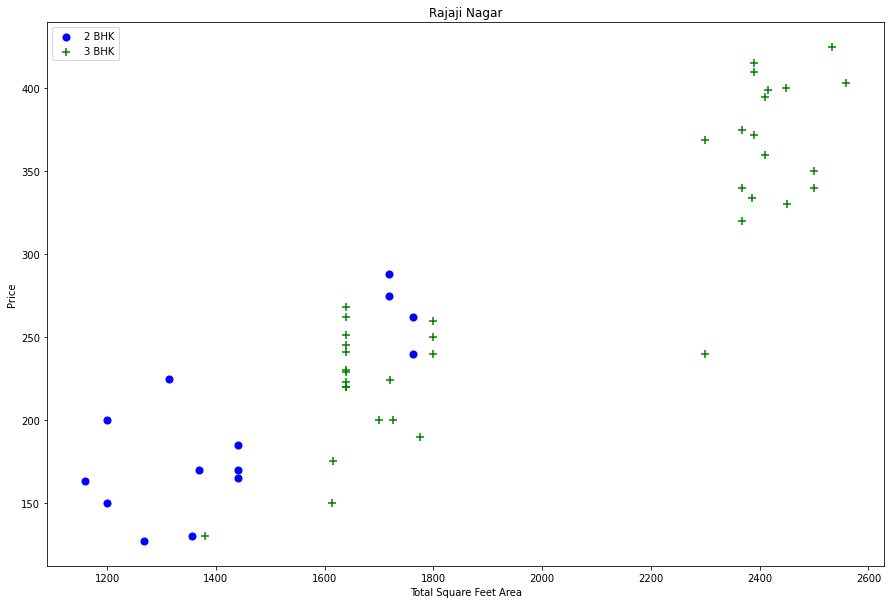

In [62]:
#function to check the difference in the prices of the houses in same locality
def plt_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

plt_scatter_chart(df7,"Rajaji Nagar")

In [64]:
# Will create a dict consisting  mean , std of bhk houses in same locations
# Done to check if the current bhk price is less than mean of the previous bhk of the same location
# if yes them dont consider that point  

def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
      bhk_stats = {}
      for bhk,bhk_df in location_df.groupby('BHK'):
        bhk_stats[bhk] = {
            'mean':np.mean(bhk_df.price_per_sqft),
            'std' : np.std(bhk_df.price_per_sqft),
            'count':bhk_df.shape[0]
        }
      for bhk,bhk_df in location_df.groupby('BHK'):
        stats = bhk_stats.get(bhk-1)
        if stats and stats['count'] > 5:
          exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [65]:
df8 = remove_bhk_outliers(df7)
df8.shape

(7326, 7)

In [66]:
  # c = 0
  # for location,location_df in df7.groupby('location'):
  #   if(c==6):
  #     break
  #   c+=1
  #   for bhk,bhk_df in location_df.groupby('BHK'):
  #   # print(location_df.groupby('BHK'))
  #     print(bhk - 1)

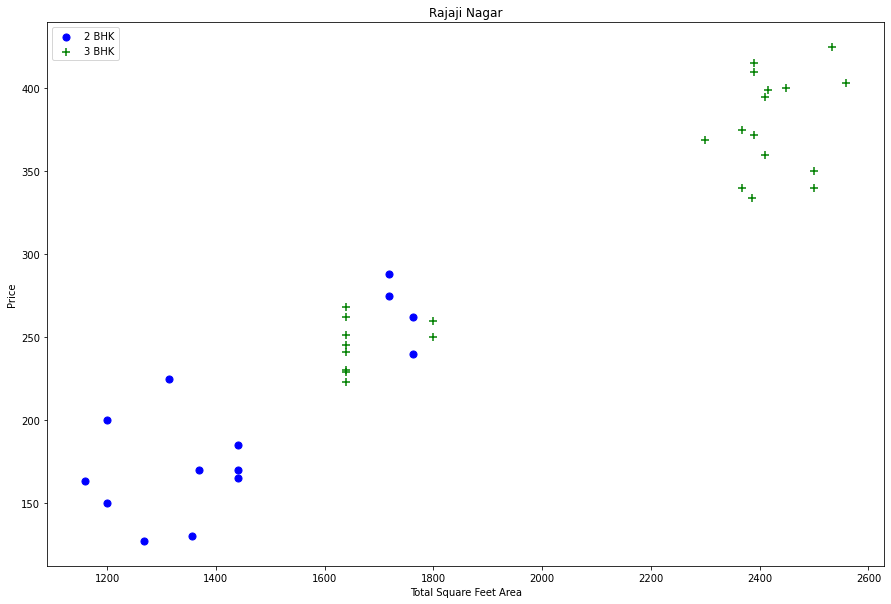

In [67]:
plt_scatter_chart(df8,"Rajaji Nagar")

In [68]:
df8.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Devarabeesana Halli,3 BHK,1672.0,3.0,150.0,3,8971.291866
1,Devarabeesana Halli,3 BHK,1750.0,3.0,149.0,3,8514.285714
2,Devarabeesana Halli,3 BHK,1750.0,3.0,150.0,3,8571.428571
4,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000
5,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667


Text(0, 0.5, 'Count')

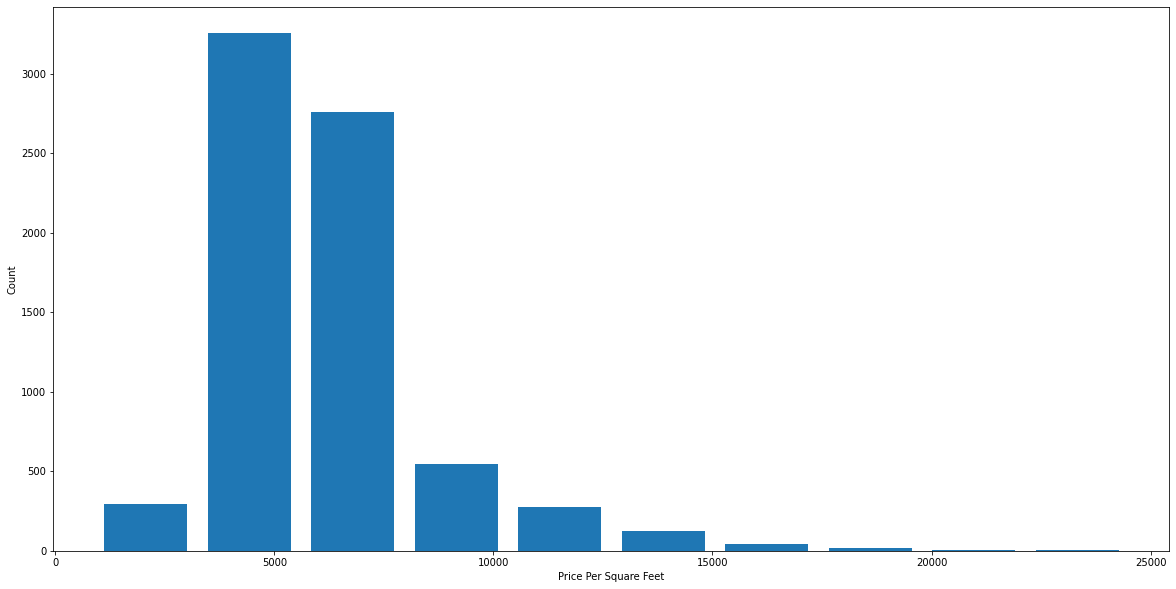

In [69]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [70]:
#Check the bathroom data 
df8.bath.unique()

array([ 3.,  2.,  1.,  4.,  5.,  8.,  6.,  7.,  9., 12., 16., 13.])

In [71]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5299,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8510,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8596,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9311,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9634,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

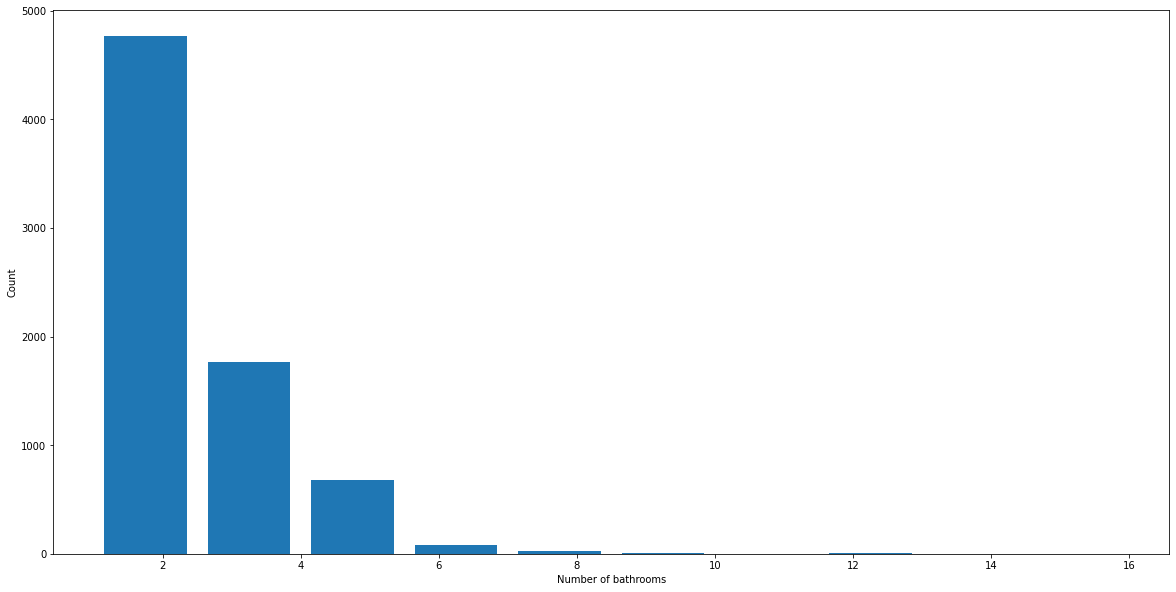

In [72]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [73]:
# Check the data which have bathrooms greater than the bedrooms + 2 bathroom
df8[df8.bath > df8.BHK+2 ]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1648,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5260,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6744,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8439,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [74]:
df8 = df8[df8.bath<df8.BHK+2]
df8.shape

(7248, 7)

In [75]:
df10 = df8.drop(['size','price_per_sqft'],axis='columns')
df10.head()

,location,total_sqft,bath,price,BHK
0,Devarabeesana Halli,1672.0,3.0,150.0,3
1,Devarabeesana Halli,1750.0,3.0,149.0,3
2,Devarabeesana Halli,1750.0,3.0,150.0,3
4,Devarachikkanahalli,1250.0,2.0,40.0,2
5,Devarachikkanahalli,1200.0,2.0,83.0,2


In [76]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,Devarabeesana Halli,Devarachikkanahalli,Mysore Highway,Thanisandra,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# Start creation of the ML Model
# Will use GridSearchCV and kfold cross validation to get the best parameters

In [78]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,Devarabeesana Halli,Devarachikkanahalli,Mysore Highway,Thanisandra,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
# Converting categorical data to numerical using get dummies
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head(3)

,location,total_sqft,bath,price,BHK,Devarabeesana Halli,Devarachikkanahalli,Mysore Highway,Thanisandra,1st Block Jayanagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Devarabeesana Halli,1672.0,3.0,150.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Devarabeesana Halli,1750.0,3.0,149.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarabeesana Halli,1750.0,3.0,150.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
df12 = df11.drop('location',axis='columns')
df12.sample(3)

,total_sqft,bath,price,BHK,Devarabeesana Halli,Devarachikkanahalli,Mysore Highway,Thanisandra,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
5580,1050.0,2.0,52.5,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,1298.0,2.0,59.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2821,3067.0,4.0,230.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
df12.shape

(7248, 254)

In [82]:
X = df12.drop('price',axis='columns')

In [83]:
y = df12.price

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [85]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train.values,y_train.values)
lr_clf.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


-2101783841624735.5

In [86]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
#Shuffle split will randomize the data 

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([-6.79933670e+15,  8.09722655e-01,  7.46655511e-01,  7.56518708e-01,
        8.34838005e-01])

In [87]:
# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_using_gridsearchcv(X,y):
  algos={
      'linear_regression':{
          'model' : LinearRegression(),
          'params':{
              'normalize' : [True,False]
          }
      },
      'lasso':{
          'model':Lasso(),
          'params':{
              'alpha':[1,2],
              'selection':['random','cyclic']
          }
      },
      'decision_tree':{
          'model':DecisionTreeRegressor(),
          'params':{
              'criterion':['mse','friedman_mse'],
              'splitter':['best','random']
          }
      }
  }
  scores=[]
  cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
  for algo_name, config in algos.items():
    gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
    gs.fit(X,y)
    scores.append({
        'model':algo_name,
        'best_score':gs.best_score_,
        'best_params':gs.best_params_
    })
  return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_using_gridsearchcv(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

,model,best_score,best_params
0,linear_regression,-1.359867e+15,{'normalize': False}
1,lasso,5.579180e-01,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,6.820685e-01,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [88]:
X.columns

Index(['total_sqft', 'bath', 'BHK', ' Devarabeesana Halli',
       ' Devarachikkanahalli', ' Mysore Highway', ' Thanisandra',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=253)

In [89]:
np.where(X.columns==" Devarachikkanahalli")[0][0]

4

In [90]:
x = np.zeros(len(X.columns))
x[0] = 35
x[1] = 5
x[2] = 7
x[4] = 1
x

array([35.,  5.,  7.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [91]:
def predict_price(location,sqft,bath,bhk):
  loc_index = np.where(X.columns==location)[0][0]

  x = np.zeros(len(X.columns))
  x[0]=sqft
  x[1] = bath
  x[2] = bhk
  if(loc_index>=0):
    x[loc_index] =1
  return lr_clf.predict([x])[0]

In [92]:
predict_price('1st Phase JP Nagar',1000,2,2)

94.0360064445125

In [93]:
predict_price('1st Phase JP Nagar',1000,2,3)

98.17583809117069

In [94]:
predict_price('Indira Nagar',1000,2,2)

195.58914050367787

In [95]:
predict_price('Indira Nagar',1000,3,3)

208.9721017564852

In [ ]:
# Export model

In [ ]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
  pickle.dump(lr_clf,f)

In [ ]:
# For predicting we need to have the columns in the same order that we had used to train
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
}
with open('columns.json',"w") as f:
  f.write(json.dumps(columns))

In [ ]:
# columns

In [ ]:
#Next Creating Python Flask Server